In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


from google.colab import drive

import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing import text

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/Google_Colab/NYCFC_Merch_Sentiment_Analysis'
os.chdir(folder_path)

In [ ]:
model = tf.keras.models.load_model('CNN_Text_Model')

In [ ]:
df = pd.read_csv('df.csv', index_col=[0])
df.head()

,post_title,comments,date_time,comment_type
0,This is a pretty nice Derby Scarf. Inaccurate ...,why is it inaccurate?,2020-08-18 14:06:54,NaN
1,This is a pretty nice Derby Scarf. Inaccurate ...,We sure aren’t playing in The Bronx this year.,2020-08-18 14:45:41,NaN
2,This is a pretty nice Derby Scarf. Inaccurate ...,Do you know if all STH get them?,2020-08-18 14:36:16,NaN
3,This is a pretty nice Derby Scarf. Inaccurate ...,I would guess so but I honestly don’t know.,2020-08-18 14:46:09,NaN
4,This is a pretty nice Derby Scarf. Inaccurate ...,I have a Fedex I'm not expecting arriving some...,2020-08-18 15:33:19,NaN


In [ ]:
new_df = df.set_index([df['post_title'], df.index]).drop('post_title', axis=1)
new_df

comments  ...   comment_type
post_title                                                                                                 ...               
This is a pretty nice Derby Scarf. Inaccurate b... 0                                why is it inaccurate?  ...            NaN
                                                   1       We sure aren’t playing in The Bronx this year.  ...            NaN
                                                   2                     Do you know if all STH get them?  ...            NaN
                                                   3          I would guess so but I honestly don’t know.  ...            NaN
                                                   4    I have a Fedex I'm not expecting arriving some...  ...            NaN
...                                                                                                   ...  ...            ...
HEADS UP! Jersey Sale At Fanatics.                 260  Just so everyone knows, pretty much all sites ...  ...  jersey, shirt
                                                   261  It looks like the same sale MLSstore.com has b...  ...            NaN
                                                   262  The grey jerseys are $10 cheaper than on mls s...  ...         jersey
                                                   263  I'm not sure if this type of thread is allowed...  ...         jersey
                                                   264  Guys seriously just get the “Players Version” ...  ...            NaN

[265 rows x 3 columns]

In [ ]:
def preprocess_text(text):
  for sentences in text:
    sentences = re.sub('\n', ' ', sentences)
    sentences = re.sub('\t', ' ', sentences)
  
  count_vectorizer = CountVectorizer(stop_words='english', lowercase=True,
                                     strip_accents='unicode', max_features=10)
  
  post_words = count_vectorizer.fit_transform(text)
  feature_words = count_vectorizer.get_feature_names()
  feaure_words = np.asarray(feature_words)
  count_list = post_words.toarray().sum(axis=0)
  word_counts_df = pd.DataFrame([feature_words, count_list], index=['Words', 'Count'])
  word_counts_df = word_counts_df.transpose()
  word_counts_df.sort_values('Count', ascending=False, inplace=True)

  return word_counts_df, text

In [ ]:
for post in df.post_title.unique():
  print(str(post) + ' top ten words')
  print(preprocess_text(df[df['post_title'] == post]['comments'])[0])

This is a pretty nice Derby Scarf. Inaccurate but nice. top ten words
     Words Count
1     know     2
0      ago     1
2  playing     1
3   refund     1
4      sth     1
5     sure     1
6    think     1
7  tickets     1
8     time     1
9    today     1
Adidas 30% off on Gotham Kit top ten words
     Words Count
1      kit     3
3   league     3
0   corona     2
2     know     2
8   people     2
9  promote     2
4  obvious     1
5    order     1
6     park     1
7    patch     1
Are there any NYCFC stops or stores around in NYC? top ten words
       Words Count
1       pele     3
3     soccer     3
0       good     2
2  selection     2
4     square     2
8      store     2
9      times     2
5    stadium     1
6       stop     1
7   stopping     1
Full view of the new Secondary Kit top ten words
     Words Count
0      new     2
7   really     2
9     says     2
1     nice     1
2   number     1
3     ones     1
4  picture     1
5  playing     1
6  pushing     1
8     rest     1
202

In [ ]:
word_counts, cleaned_text = preprocess_text(new_df['comments'])

In [ ]:
from tensorflow.keras.preprocessing import text

tokenizer = text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(cleaned_text)
print(tokenizer.word_index)
tokenized_data = tokenizer.texts_to_matrix(cleaned_text)

{'the': 1, 'a': 2, 'i': 3, 'to': 4, 'it': 5, 'and': 6, 'for': 7, 'is': 8, 'on': 9, 'in': 10, 'this': 11, 'have': 12, 'of': 13, 'but': 14, 'they': 15, 'that': 16, 'if': 17, 'you': 18, 'adidas': 19, 'one': 20, 'be': 21, 'like': 22, 'com': 23, 'kit': 24, 'or': 25, 'so': 26, 'with': 27, 'https': 28, 'not': 29, "it's": 30, 'me': 31, 'would': 32, 'are': 33, 'jersey': 34, 'an': 35, 'new': 36, 'get': 37, 'just': 38, 'it’s': 39, 'as': 40, 'we': 41, 'looking': 42, 'know': 43, 'how': 44, 'can': 45, 'at': 46, 'think': 47, 'was': 48, 'good': 49, 'mls': 50, 'i’m': 51, 'orange': 52, 'all': 53, 'from': 54, 'store': 55, 'jpg': 56, 'do': 57, 'got': 58, 'nice': 59, 'looks': 60, 'manhattan': 61, 'pin': 62, "i'm": 63, 'some': 64, 'brooklyn': 65, 'still': 66, 'there': 67, 'stripes': 68, 'really': 69, 'out': 70, "don't": 71, 'up': 72, 'staten': 73, 'island': 74, 'my': 75, 'more': 76, 'going': 77, 'been': 78, 'city': 79, 'shirt': 80, 'love': 81, 'only': 82, 'these': 83, 'same': 84, 'nycfc': 85, 'extra': 86, '

In [ ]:
word_counts

,Words,Count
0,adidas,31
7,like,30
1,com,28
6,kit,28
3,https,24
2,don,19
4,jersey,19
9,new,19
5,just,17
8,looking,16


In [ ]:
MAX_LEN = 1000

input_data = tf.keras.preprocessing.sequence.pad_sequences(tokenized_data, maxlen=MAX_LEN)

sentiment_prediction = model.predict(input_data)

In [ ]:
predictions = [np.argsort(i)[-1] for i in sentiment_prediction]
classes = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}

class_predictions = [classes[prediction] for prediction in predictions]

In [ ]:
new_df['sentiment'] = class_predictions

In [ ]:
thread_id = [i for i in range(len(df['post_title'].unique()))]

d = {}
for i in thread_id:
  d[df['post_title'].unique()[i]] = i

In [ ]:
df['thread_id'] = df['post_title'].map(d)

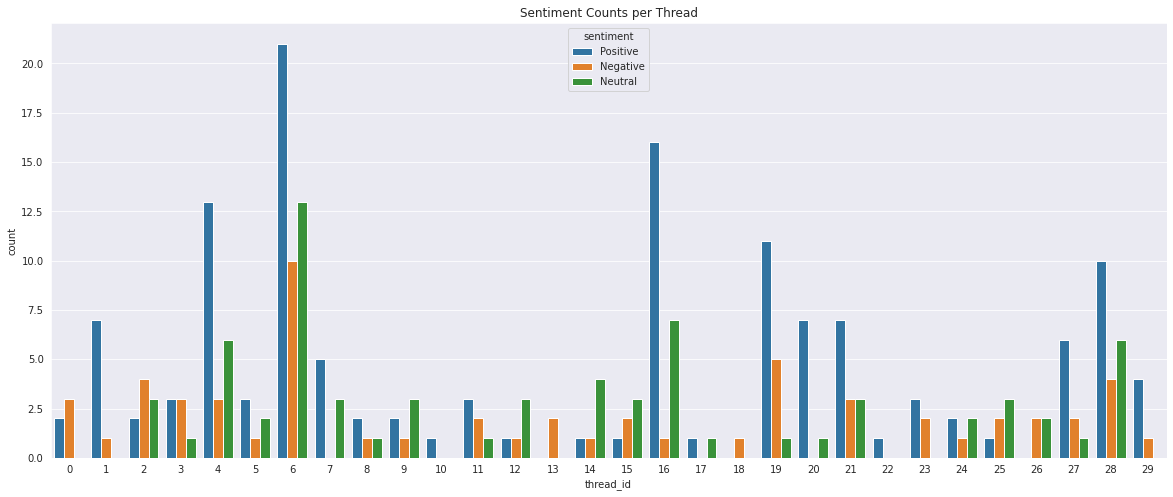

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

plot_x = list(range(len(new_df.index.get_level_values(0).unique())))

plt.figure(figsize=(20, 8))
g = sns.countplot(x=df['thread_id'], hue='sentiment', data=df)
plt.title('Sentiment Counts per Thread')
plt.show()

In [ ]:
df[(df['thread_id'] == 6) | (df['thread_id'] == 16)]

,post_title,comments,date_time,comment_type,sentiment,thread_id
57,Leaked Away Kit,So we're basically getting a parley jersey as ...,2020-01-29 17:20:53,jersey,Positive,6
58,Leaked Away Kit,Is boring and safe. Is forgettable,2020-01-29 21:44:34,NaN,Neutral,6
59,Leaked Away Kit,I need to see it on a person. I'm inclined to ...,2020-01-29 17:51:38,NaN,Positive,6
60,Leaked Away Kit,I think that was the case last change kit with...,2020-01-29 23:59:42,NaN,Positive,6
61,Leaked Away Kit,"please sir, may we have a crumb of orange",2020-01-29 18:14:31,NaN,Negative,6
...,...,...,...,...,...,...
164,Pin Swaps,"Looking for a Bronx Pin, have a spare Manhatta...",2019-08-13 22:02:14,NaN,Positive,16
165,Pin Swaps,Any one have an extra Staten Island pin?,2019-08-19 23:07:05,NaN,Neutral,16
166,Pin Swaps,"Got Queens, Staten Island, or Manhattan for a ...",2019-08-22 02:31:57,NaN,Positive,16
167,Pin Swaps,Looking for a Queens pin. Willing to trade for...,2019-08-22 05:32:40,NaN,Positive,16


So from the analysis above it looks like people are speaking positively of the leaked away kit, and of the pins. It looks like they enjoy swapping pins with each other. Maybe that's something that can be built upon, for example maybe the club can make a number of different exclusive pins, or hold events where people can trade exclusive pins with each other as a promotional tool.

In [ ]:
df.comments[101]

'Feel like I’m actually going to enjoy our version of this template.'

In [ ]:
df.sentiment[101]

'Positive'